Import All Neccessary Packages


In [ ]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras import models
from keras.datasets import mnist

Preprocessing

In [ ]:
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


CNN Model

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1),
          padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, batch_size=128,
                  epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 72ms/step - accuracy: 0.8386 - loss: 0.5277 - val_accuracy: 0.9725 - val_loss: 0.0878
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9625 - loss: 0.1329 - val_accuracy: 0.9798 - val_loss: 0.0628
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9739 - loss: 0.0873 - val_accuracy: 0.9828 - val_loss: 0.0539
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9790 - loss: 0.0673 - val_accuracy: 0.9831 - val_loss: 0.0510
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9812 - loss: 0.0585 - val_accuracy: 0.9838 - val_loss: 0.0502
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.9853 - loss: 0.0494 - val_accuracy: 0.9864 - val_loss: 0.0456
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9864 - loss: 0.0424 - val_accuracy: 0.9863 - val_loss: 0.0446
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9889 - loss: 0.0361 - 

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,158,080 (15.86 MB)

 Trainable params: 1,386,026 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,772,054 (10.57 MB)

In [ ]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 2s - 6ms/step - accuracy: 0.9858 - loss: 0.0636
Test loss: 6.363487988710403
Test accuracy: 98.580002784729


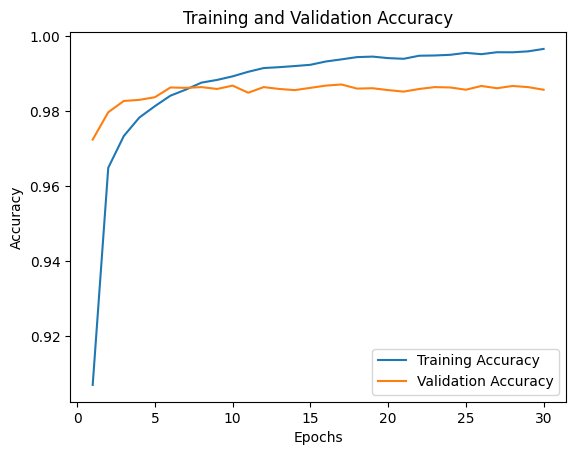

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

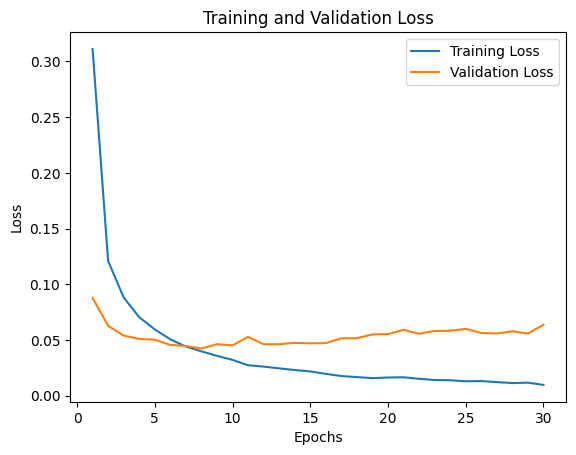

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import time
import numpy as np

# Measure total time and epoch time
epoch_times = []
total_start = time.time()

for epoch in range(30):
    print(f"\nEpoch {epoch+1}/30")
    start = time.time()
    history_epoch = model.fit(X_train, Y_train, batch_size=128, epochs=1, validation_data=(X_test, Y_test), verbose=1)
    end = time.time()
    epoch_duration = end - start
    epoch_times.append(epoch_duration)
    print(f"Epoch Time: {epoch_duration:.2f} seconds")

total_end = time.time()
total_time = total_end - total_start
avg_epoch_time = np.mean(epoch_times)
avg_step_time = (avg_epoch_time * 128) / X_train.shape[0]

# Evaluate final test performance
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0] * 100
accuracy_cnn = test_scores[1] * 100

# Print results
print("\n--- Final Metrics ---")
print(f"Test Loss: {loss_cnn:.2f}")
print(f"Test Accuracy: {accuracy_cnn:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")
print(f"Average Epoch Time: {avg_epoch_time:.2f} seconds")
print(f"Step Time (approximate per batch): {avg_step_time:.4f} seconds")



Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.9963 - loss: 0.0105 - val_accuracy: 0.9864 - val_loss: 0.0605
Epoch Time: 41.90 seconds

Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9870 - val_loss: 0.0591
Epoch Time: 32.72 seconds

Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 0.9865 - val_loss: 0.0648
Epoch Time: 41.33 seconds

Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.9969 - loss: 0.0096 - val_accuracy: 0.9873 - val_loss: 0.0615
Epoch Time: 41.39 seconds

Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9967 - loss: 0.0094 - val_accuracy: 0.9876 - val_loss: 0.0618
Epoch Time: 41.26 seconds

Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9868 - val_loss: 0.0632
Epoch Time: 32.42 seconds

Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - a

In [ ]:
import time
import numpy as np

# Use 50% of training data
X_train_half = X_train[:len(X_train)//2]
Y_train_half = Y_train[:len(Y_train)//2]

# Measure total time and epoch time
epoch_times = []
total_start = time.time()

for epoch in range(30):
    print(f"\nEpoch {epoch+1}/30")
    start = time.time()
    history_epoch = model.fit(X_train_half, Y_train_half, batch_size=128, epochs=1, validation_data=(X_test, Y_test), verbose=1)
    end = time.time()
    epoch_duration = end - start
    epoch_times.append(epoch_duration)
    print(f"Epoch Time: {epoch_duration:.2f} seconds")

total_end = time.time()
total_time = total_end - total_start
avg_epoch_time = np.mean(epoch_times)
avg_step_time = (avg_epoch_time * 128) / len(X_train_half)

# Evaluate final test performance
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0] * 100
accuracy_cnn = test_scores[1] * 100

# Print results
print("\n--- Final Metrics (50% Training Data) ---")
print(f"Test Loss: {loss_cnn:.2f}")
print(f"Test Accuracy: {accuracy_cnn:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")
print(f"Average Epoch Time: {avg_epoch_time:.2f} seconds")
print(f"Step Time (approximate per batch): {avg_step_time:.4f} seconds")



Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9989 - loss: 0.0032 - val_accuracy: 0.9877 - val_loss: 0.0743
Epoch Time: 20.66 seconds

Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9981 - loss: 0.0047 - val_accuracy: 0.9878 - val_loss: 0.0775
Epoch Time: 16.37 seconds

Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9875 - val_loss: 0.0783
Epoch Time: 16.35 seconds

Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.9883 - val_loss: 0.0733
Epoch Time: 18.50 seconds

Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9877 - val_loss: 0.0704
Epoch Time: 20.65 seconds

Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.9988 - loss: 0.0034 - val_accuracy: 0.9883 - val_loss: 0.0753
Epoch Time: 18.71 seconds

Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - a

In [ ]:
import time
import numpy as np

# Use 25% of training data
X_train_quarter = X_train[:len(X_train)//4]
Y_train_quarter = Y_train[:len(Y_train)//4]

# Measure total time and epoch time
epoch_times = []
total_start = time.time()

for epoch in range(30):
    print(f"\nEpoch {epoch+1}/30")
    start = time.time()
    history_epoch = model.fit(X_train_quarter, Y_train_quarter, batch_size=128, epochs=1, validation_data=(X_test, Y_test), verbose=1)
    end = time.time()
    epoch_duration = end - start
    epoch_times.append(epoch_duration)
    print(f"Epoch Time: {epoch_duration:.2f} seconds")

total_end = time.time()
total_time = total_end - total_start
avg_epoch_time = np.mean(epoch_times)
avg_step_time = (avg_epoch_time * 128) / len(X_train_quarter)

# Evaluate final test performance
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0] * 100
accuracy_cnn = test_scores[1] * 100

# Print results
print("\n--- Final Metrics (25% Training Data) ---")
print(f"Test Loss: {loss_cnn:.2f}")
print(f"Test Accuracy: {accuracy_cnn:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")
print(f"Average Epoch Time: {avg_epoch_time:.2f} seconds")
print(f"Step Time (approximate per batch): {avg_step_time:.4f} seconds")



Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9877 - val_loss: 0.0908
Epoch Time: 10.92 seconds

Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9871 - val_loss: 0.0929
Epoch Time: 10.35 seconds

Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9990 - loss: 0.0022 - val_accuracy: 0.9873 - val_loss: 0.0922
Epoch Time: 10.35 seconds

Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9987 - loss: 0.0034 - val_accuracy: 0.9871 - val_loss: 0.0995
Epoch Time: 10.43 seconds

Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9985 - loss: 0.0039 - val_accuracy: 0.9876 - val_loss: 0.0939
Epoch Time: 10.36 seconds

Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9873 - val_loss: 0.1024
Epoch Time: 20.59 seconds

Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - acc

In [ ]:
import os, psutil

print(f"Total CPUs: {os.cpu_count()}")
ram = psutil.virtual_memory()
print(f"Total RAM: {ram.total / (1024**3):.2f} GB")

Total CPUs: 2
Total RAM: 12.67 GB
